# Construction de l'indicateur composite de pauvreté non monétaire

## Étapes de construction d'un indicateur

Les étapes suivantes sont préconisées par l’OCDE pour la construction d’un indicateur composite :
* Élaboration d'un cadre théorique ;
* Sélection des variables ;
*  Analyses Multivariées ;
*  Imputation des données manquantes ;
* Normalisation ;
* Pondération et agrégation ;
* Robustesse et sensibilité ;
* Lien vers d’autres variables 

## Forme algébrique de l'indicateur

La construction de l'ICP non monétaire pour chaque unité de la population sera effectuée à l'aide des techniques d'analyses multidimensionnelles. Parmi lesquelles l'ACM qui est la plus adaptée car toutes les variables sont qualitatives. La forme fonctionnelle de l'ICP est selon Louis-Marie Asselin (2002) :

$$C_i = \left( \sum_{k=1}^{K} \sum_{j_k=1}^{J_k} W_{j_k}^k I_{j_k}^k \right)/K$$

Où :

* $K$ = nombre de variables catégorielles ;
* $J_k$ = nombre de modalités de la $k$-ième variable ;
* $j_k$ = modalités de la $k$-ième variables ;
* $W_{j_k}^k$ = le poids (coordonnées factorielles sur le premier axe) normalisé ($\text{Score}/\sqrt{\lambda_1}$  avec $\lambda_1$ la valeur propre de l’axe 1) ;

* Les coefficients de pondération obtenus par l’ACM correspondent aux scores normalisés sur le premier axe factoriel ;
* La valeur de l’ICP pour tout ménage $m$ correspond tout simplement à la moyenne des scores normalisés des variables catégoriques ;
* Le poids d’une catégorie est la moyenne des scores normalisés des unités de population appartenant à cette catégorie.
* Toutes les modalités des variables étant transformées en indicateurs codés en $0$ ou $1$, donnant au total $P$ indicateurs binaires, l’ICP pour un ménage $i$ donné, peut encore s’écrire :

$$\text{ICP}_i = (1/K) \left( W_1 I_{i1} + W_2 I_{i2} + \dots + W_P I_{iP} \right)$$

Où $W_p$ = le poids (score de premier axe normalisé, $\text{Score}/\sqrt{\lambda_1}$) de la catégorie $p$, $\lambda_1$ étant la première valeur propre.
$I_p$, $p=1$ à $P$ : Indicateur binaire $0/1$, prenant la valeur $1$ lorsque le ménage a la modalité $p$ et $0$ sinon.

N.B : Cependant, le pourcentage d'inertie est généralement faible en raison du nombre de colonnes que l'on obtient après le codage de la table disjonctive complète (Cloutier-Villeneuve & Saint-Frard, 2015).
le tableau disjonctif complet (Cloutier-Villeneuve & Saint-Frard, 2015). Pour obtenir les pourcentages réels, Benzécri (1979) propose de retenir les axes principaux dont les valeurs propres sont supérieures à l'inverse du nombre de variables actives du modèle. Ainsi, en supposant que l'ICP est fourni par un ensemble de K variables, Benzécri (1979) propose ce qui suit :

i. Conserver les valeurs propres : $\lambda_k \ge 1/K$,

ii. Calculer les nouvelles valeurs propres à partir de la formule : 

$$\tilde{\lambda_k} = \left[ \left( \frac{K}{K-1} \right) \left( \lambda_k - \frac{1}{K} \right) \right]^2$$





# Mise en oeuvre 

L’objectif de l'étude est de développer un indicateur appelé "Indicateur de
Connexion des Ménages à l’Économie" (ICME) qui permet de cibler les ménages confrontés
à des privations en termes de services sociaux de base, d’infrastructures et d’opportunités
économiques, et d’évaluer son impact sur le bien-être.

In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import scipy.stats # pour les stats descp 
import numpy as np # pour les calculs numériques, algébriques, etc. 
import pylab # un melange de 
import pandas as pd # pour les data frames
import seaborn as sns # pour les graphiques 
import statistics # stats
import statsmodels.api as smi # modeles de regression
from fanalysis.mca import MCA
import matplotlib.pyplot as plt 
import sklearn 
import polars
import mapply
import plotnine
import pingouin
import scientisttools 
import scientistmetrics
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## Importation de la base de données 

In [2]:
base = pd.read_excel('base_pauvrete.xlsx')

In [3]:
base.head()

,region,milieu,hhweight,hgender,hage,halfab,heduc,hhandig,hactiv12m,logem,...,ordure,toilet,eva_eau,tv,fer,frigo,cuisin,ordin,decod,car
0,DAKAR,Urbain,1749.832,Féminin,59,Oui,Primaire,Non,Occupe,Locataire,...,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Non,Non,Non
1,DAKAR,Urbain,1749.832,Masculin,59,Oui,Superieur,Non,Occupe,Locataire,...,Oui,Oui,Oui,Non,Non,Oui,Oui,Oui,Non,Oui
2,DAKAR,Urbain,1749.832,Masculin,27,Oui,Superieur,Non,Occupe,Locataire,...,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Oui,Oui
3,DAKAR,Urbain,266.317,Masculin,85,Oui,Primaire,Non,Non occupe,Proprietaire titre,...,Oui,Oui,Oui,Oui,Non,Oui,Non,Non,Oui,Non
4,DAKAR,Urbain,266.317,Masculin,40,Non,Aucun,Non,Occupe,Locataire,...,Oui,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non


* Parcours de la base de données 

In [4]:
base.shape

(7156, 28)

In [5]:
base.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     7156 non-null   object 
 1   milieu     7156 non-null   object 
 2   hhweight   7156 non-null   float64
 3   hgender    7156 non-null   object 
 4   hage       7156 non-null   int64  
 5   halfab     7156 non-null   object 
 6   heduc      7156 non-null   object 
 7   hhandig    7156 non-null   object 
 8   hactiv12m  7156 non-null   object 
 9   logem      7156 non-null   object 
 10  mur        7156 non-null   object 
 11  toit       7156 non-null   object 
 12  sol        7156 non-null   object 
 13  eauboi_ss  7156 non-null   object 
 14  eauboi_sp  7156 non-null   object 
 15  elec_ac    7156 non-null   object 
 16  elec_ur    7156 non-null   object 
 17  elec_ua    7156 non-null   object 
 18  ordure     7156 non-null   object 
 19  toilet     7156 non-null   object 
 20  eva_eau 

In [6]:
base.columns

Index(['region', 'milieu', 'hhweight', 'hgender', 'hage', 'halfab', 'heduc',
       'hhandig', 'hactiv12m', 'logem', 'mur', 'toit', 'sol', 'eauboi_ss',
       'eauboi_sp', 'elec_ac', 'elec_ur', 'elec_ua', 'ordure', 'toilet',
       'eva_eau', 'tv', 'fer', 'frigo', 'cuisin', 'ordin', 'decod', 'car'],
      dtype='object')

* Vérification des valeurs manquantes

In [7]:
base.isna().sum() # Pas de NaN values

region       0
milieu       0
hhweight     0
hgender      0
hage         0
halfab       0
heduc        0
hhandig      0
hactiv12m    0
logem        0
mur          0
toit         0
sol          0
eauboi_ss    0
eauboi_sp    0
elec_ac      0
elec_ur      0
elec_ua      0
ordure       0
toilet       0
eva_eau      0
tv           0
fer          0
frigo        0
cuisin       0
ordin        0
decod        0
car          0
dtype: int64

In [8]:
data = base.drop(["region", "hhweight", "hage"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   milieu     7156 non-null   object
 1   hgender    7156 non-null   object
 2   halfab     7156 non-null   object
 3   heduc      7156 non-null   object
 4   hhandig    7156 non-null   object
 5   hactiv12m  7156 non-null   object
 6   logem      7156 non-null   object
 7   mur        7156 non-null   object
 8   toit       7156 non-null   object
 9   sol        7156 non-null   object
 10  eauboi_ss  7156 non-null   object
 11  eauboi_sp  7156 non-null   object
 12  elec_ac    7156 non-null   object
 13  elec_ur    7156 non-null   object
 14  elec_ua    7156 non-null   object
 15  ordure     7156 non-null   object
 16  toilet     7156 non-null   object
 17  eva_eau    7156 non-null   object
 18  tv         7156 non-null   object
 19  fer        7156 non-null   object
 20  frigo      7156 non-null   obj

## Réalisation de l'ACM

In [9]:
from scientisttools import MCA 
res_mca = MCA(n_components=25, quali_sup = [0,1], parallelize=False)
res_mca.fit(data)

MCA(n_components=25, quali_sup=[0, 1])

### Analyse des valeurs propres

Il ressort de l’analyse de ce tableau que le premier axe représente 18,75\% de l’inertie totale et le deuxième axe 6,25\%. Le premier
plan représente donc environ 25\% de l’inertie totale.

In [10]:
print(res_mca.eig_)

        eigenvalue  difference  proportion  cumulative
Dim.1     0.269007    0.179347   18.748964   18.748964
Dim.2     0.089659    0.014711    6.248989   24.997953
Dim.3     0.074948    0.010340    5.223678   30.221631
Dim.4     0.064608    0.007387    4.502986   34.724617
Dim.5     0.057221    0.005464    3.988101   38.712718
Dim.6     0.051756    0.000706    3.607251   42.319969
Dim.7     0.051051    0.006545    3.558072   45.878041
Dim.8     0.044505    0.000649    3.101882   48.979923
Dim.9     0.043856    0.000252    3.056643   52.036567
Dim.10    0.043604    0.000062    3.039080   55.075646
Dim.11    0.043542    0.000214    3.034774   58.110420
Dim.12    0.043328    0.000110    3.019861   61.130282
Dim.13    0.043218    0.000425    3.012186   64.142468
Dim.14    0.042794    0.000345    2.982594   67.125062
Dim.15    0.042449    0.001633    2.958552   70.083614
Dim.16    0.040816    0.004240    2.844753   72.928367
Dim.17    0.036576    0.002015    2.549251   75.477618
Dim.18    

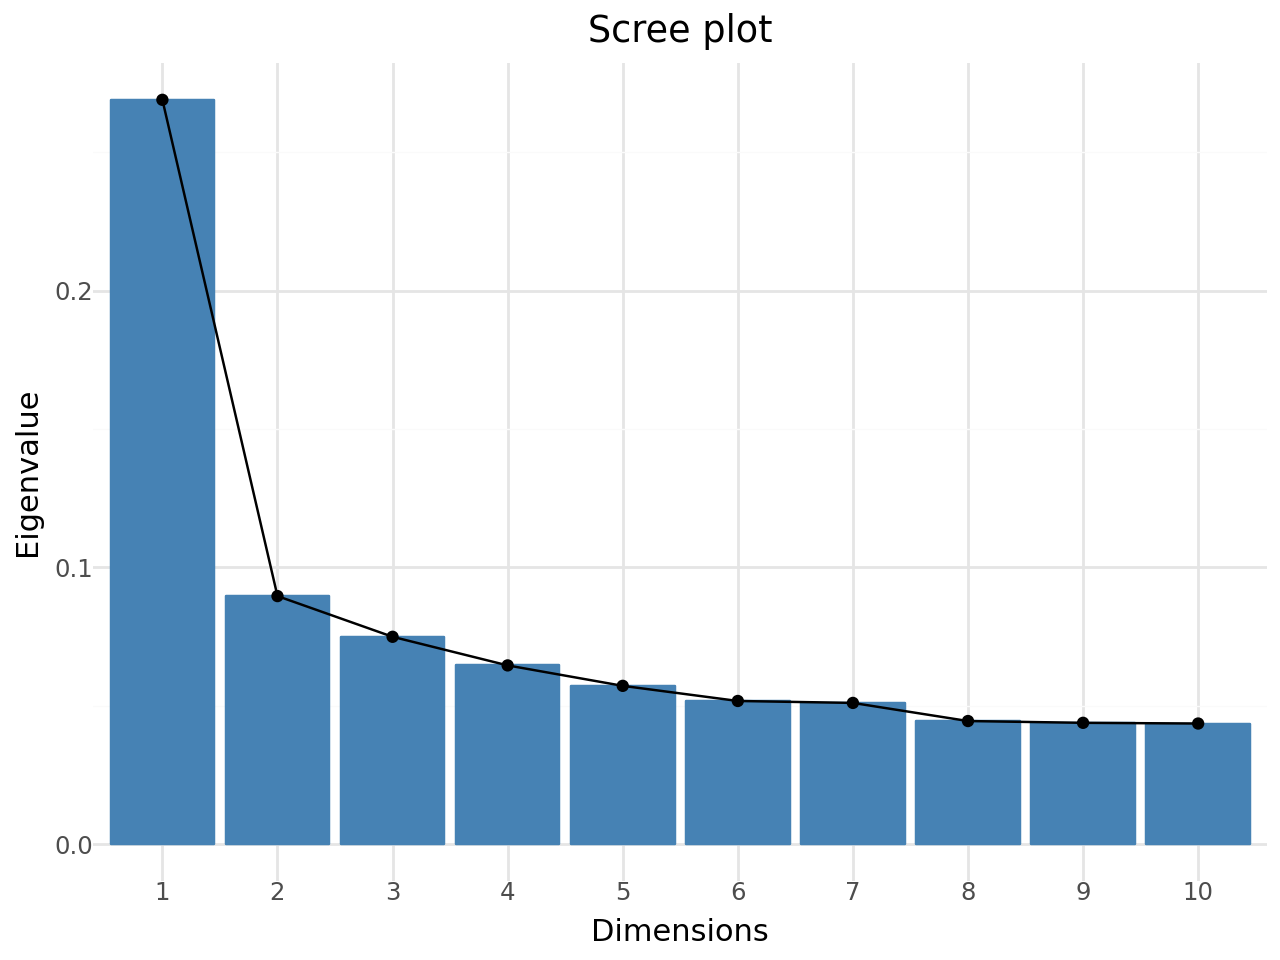

In [11]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mca,choice="eigenvalue")
print(p)

### Correction de Benzecri

La correction de Benzecri montre que le premier axe représente 93\% de l'information. D'où le choix de ce dernier pour le calul des poids normalisés. 

In [12]:
print(res_mca.benzecri_correction_)

          eigenvalue  proportion  cumulative
Dim.1   5.559217e-02   92.903070   92.903070
Dim.2   2.330986e-03    3.895437   96.798507
Dim.3   1.082451e-03    1.808943   98.607450
Dim.4   4.879788e-04    0.815488   99.422938
Dim.5   2.064096e-04    0.344942   99.767880
Dim.6   7.489565e-05    0.125162   99.893042
Dim.7   6.267158e-05    0.104734   99.997776
Dim.8   1.152800e-06    0.001927   99.999703
Dim.9   1.561075e-07    0.000261   99.999964
Dim.10  1.733143e-08    0.000029   99.999992
Dim.11  4.497830e-09    0.000008  100.000000


### Nuage des variables 

Le premier axe qui contribue à au moins 18% de l’information oppose deux catégories de
ménages.

D’un côté, les ménages vivants en milieu urbain qui ont facilement accès à l’éducation, à
l’information, à l’électricité, à la téléphonie, à l’eau potable, avec des logements en dur et très
souvent en location; et de l’autre coté, les ménages vivants en milieu rural qui, contrairement
aux ménages issus du milieu urbain ont un accès limité à l’éducation, à l’information, à
l’électricité, à la téléphonie, à l’eau potable, avec des logements en banco et généralement
propriétaires.

De cette analyse, Il ressort que l’axe 1 reflète bien la situation de bien-être, donc de la
pauvreté. L’axe 2 quant à lui oppose les ménages dirigés par les femmes (vivants le plus en milieu urbain, non pauvres) et ceux dirigés par les hommes (vivants le plus en milieu rural, pauvres).

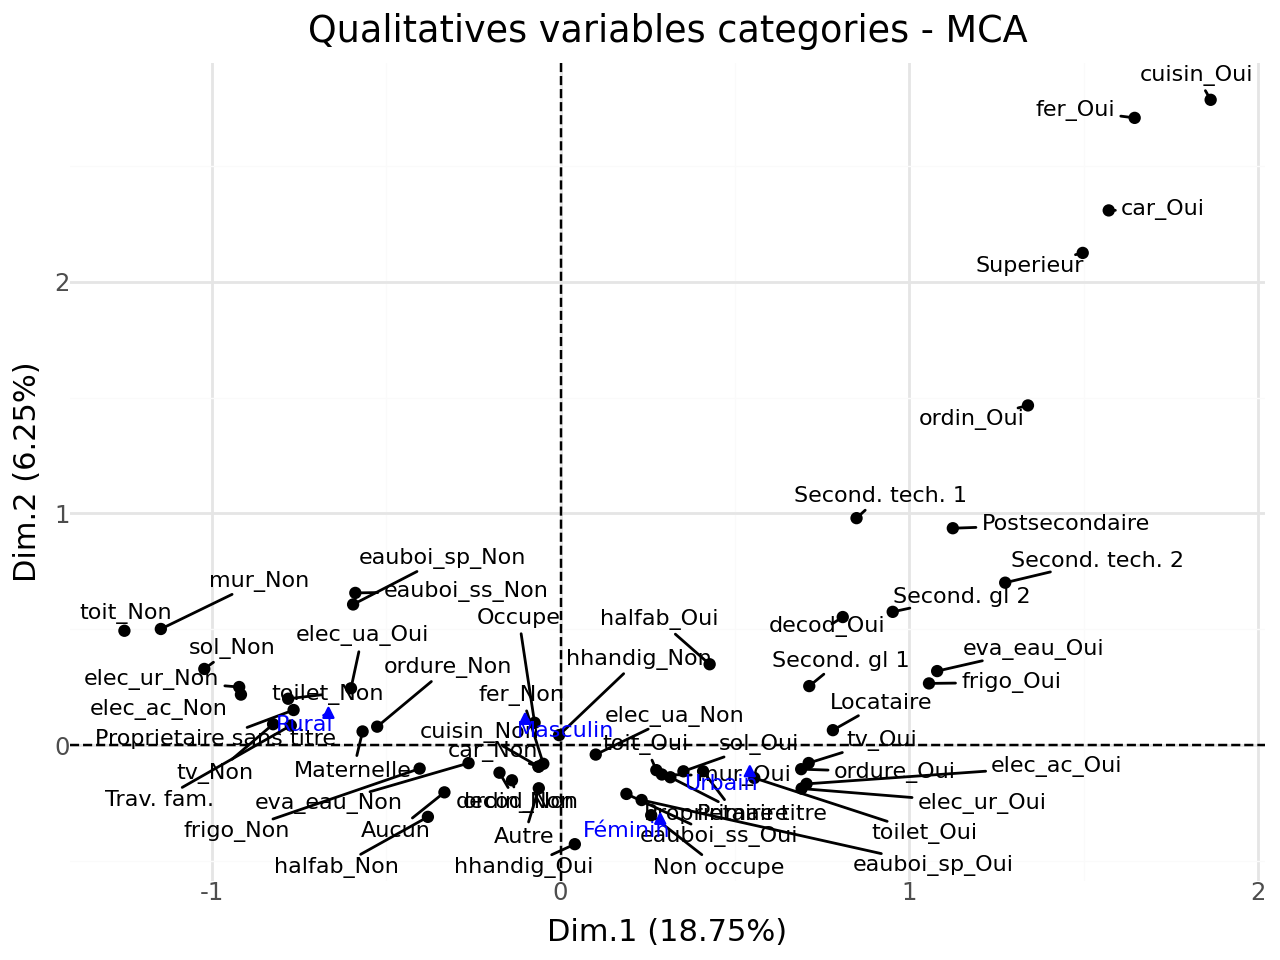

In [13]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(res_mca,repel=True)
print(p)

### Analyse des contributions

Toutes les modalités de la variable Handicap majeure contribuent faiblement à la contruction de l'axe 1. Elle sera donc écartée de la construction de l'indicateur.  

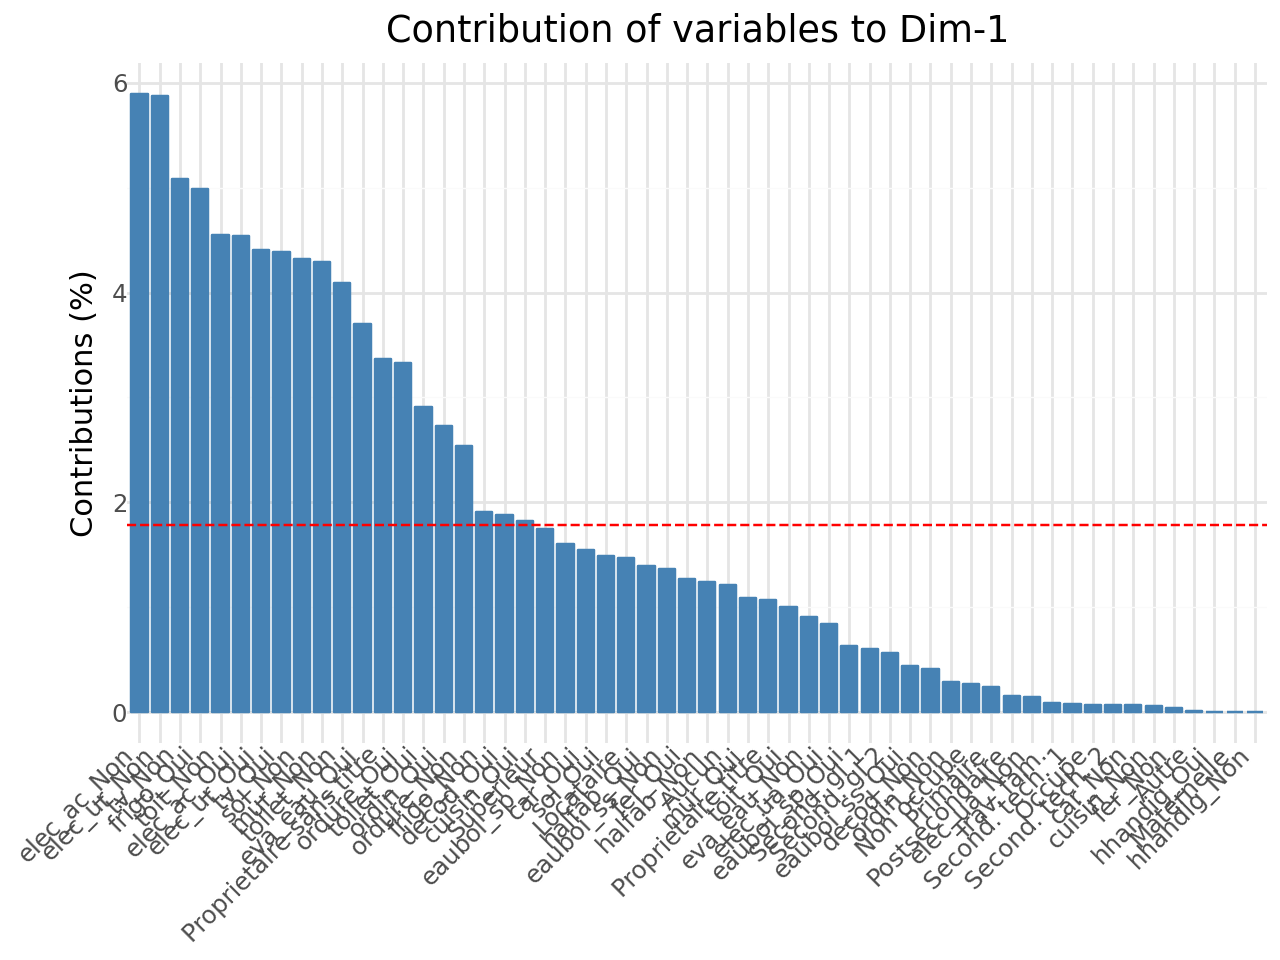

In [14]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mca,choice="var")
print(p)

Les cosinus élevés montrent un groupe de variables caractérisant les personnes ayant un véhicule, une cuisine, un fer, un niveau d'éducation supérieure et un ordinateur.

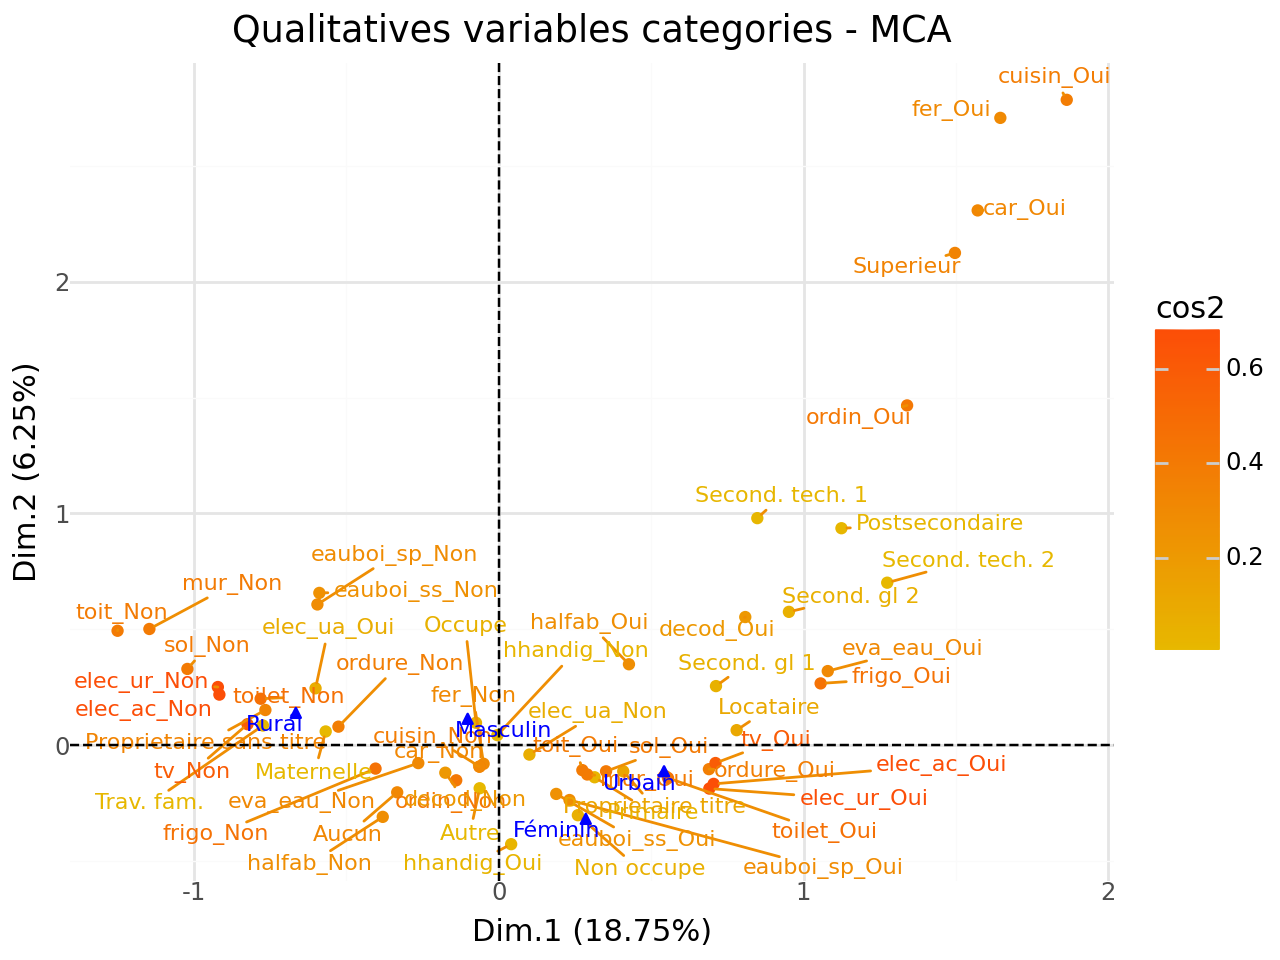

In [15]:
p = fviz_mca_mod(res_mca,color="cos2",repel=True)
print(p)

### Cosinus carrés

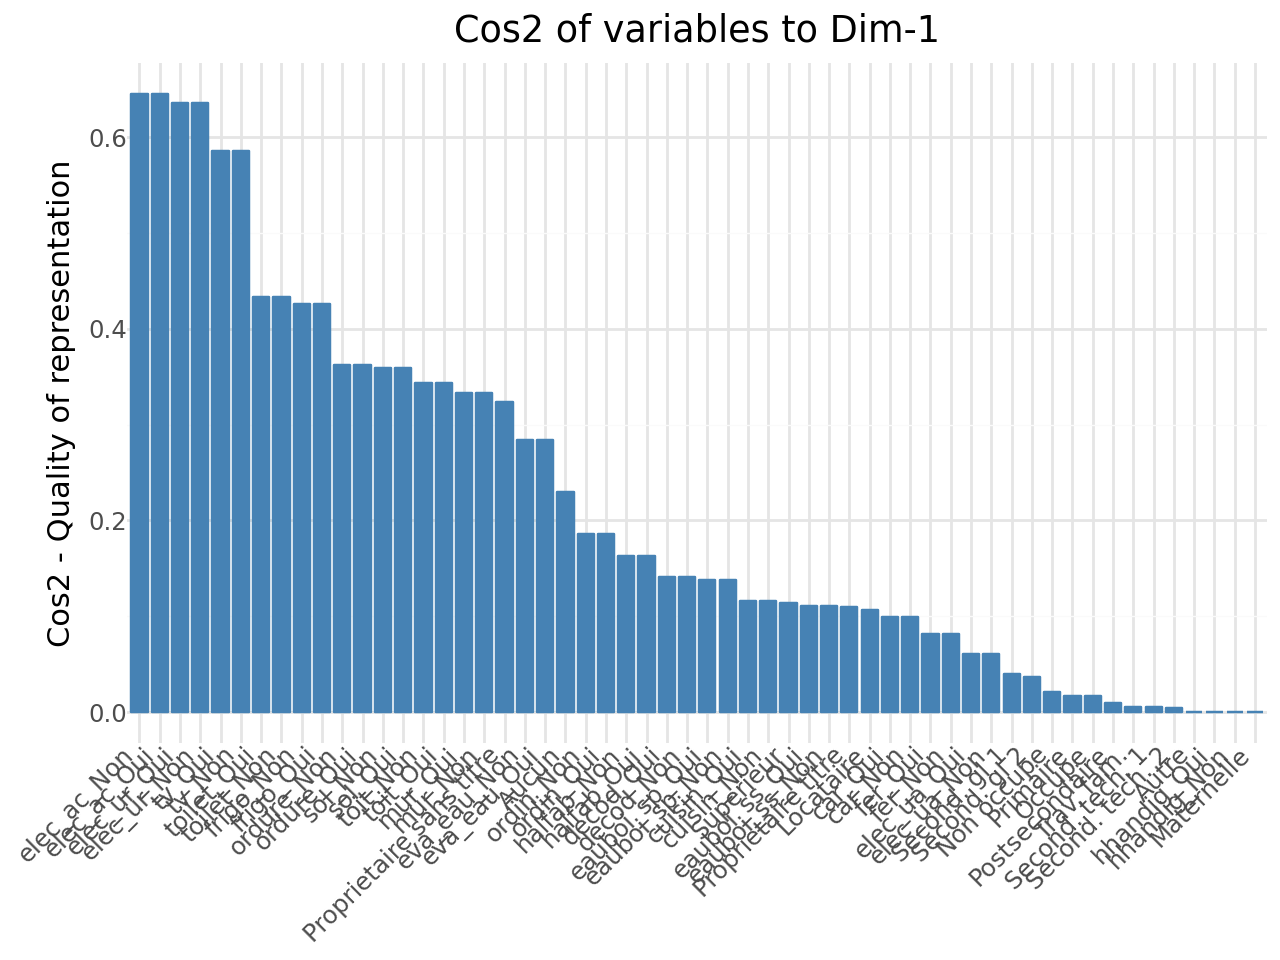

In [16]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mca,choice = "var")
print(p)

In [17]:
data_final = data.drop(["hhandig"], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   milieu     7156 non-null   object
 1   hgender    7156 non-null   object
 2   halfab     7156 non-null   object
 3   heduc      7156 non-null   object
 4   hactiv12m  7156 non-null   object
 5   logem      7156 non-null   object
 6   mur        7156 non-null   object
 7   toit       7156 non-null   object
 8   sol        7156 non-null   object
 9   eauboi_ss  7156 non-null   object
 10  eauboi_sp  7156 non-null   object
 11  elec_ac    7156 non-null   object
 12  elec_ur    7156 non-null   object
 13  elec_ua    7156 non-null   object
 14  ordure     7156 non-null   object
 15  toilet     7156 non-null   object
 16  eva_eau    7156 non-null   object
 17  tv         7156 non-null   object
 18  fer        7156 non-null   object
 19  frigo      7156 non-null   object
 20  cuisin     7156 non-null   obj

In [18]:
from scientisttools import MCA 
res_mca1 = MCA(n_components=25, quali_sup = [0,1], parallelize=False)
results = res_mca1.fit(data_final)

In [19]:
res_mca1.eig_

,eigenvalue,difference,proportion,cumulative
Dim.1,0.281228,0.187895,19.334428,19.334428
Dim.2,0.093333,0.014980,6.416631,25.751059
Dim.3,0.078353,0.013581,5.386759,31.137819
Dim.4,0.064772,0.005027,4.453098,35.590917
Dim.5,0.059746,0.006110,4.107507,39.698424
Dim.6,0.053636,0.003026,3.687475,43.385899
Dim.7,0.050610,0.004254,3.479411,46.865309
Dim.8,0.046356,0.000607,3.186965,50.052274
Dim.9,0.045749,0.000179,3.145232,53.197507
Dim.10,0.045570,0.000059,3.132922,56.330428


On retient le premier axe

### Coordonnées factotielles ou scores

In [20]:
res_mca1.var_

{'coord':                             Dim.1     Dim.2     Dim.3     Dim.4     Dim.5  \
 halfab_Non              -0.380248 -0.298949  0.084295 -0.551381 -0.050159   
 halfab_Oui               0.427666  0.336229 -0.094807  0.620140  0.056414   
 Aucun                   -0.332783 -0.197122  0.067740 -0.388816 -0.055646   
 Maternelle              -0.566383 -0.009229  2.089384  2.030296  4.884974   
 Postsecondaire           1.125323  0.890238  0.252205  0.650465 -0.231790   
 Primaire                 0.315049 -0.159350 -0.454533  0.980310  0.072575   
 Second. gl 1             0.712958  0.248669 -0.292410  0.993205  0.147205   
 Second. gl 2             0.952378  0.559825  0.008424  0.946941  0.407393   
 Second. tech. 1          0.848580  0.983472  0.312224  0.294263  0.139905   
 Second. tech. 2          1.274922  0.689040 -0.559026 -0.461849  0.240185   
 Superieur                1.497371  2.115826  0.816767  0.046856 -0.017798   
 Non occupe               0.258852 -0.245113 -0.131928 

### Scores des modalités pour le 1er axe factorielle

In [22]:
dim1_score = res_mca1.var_['coord']['Dim.1'].values
dim1_score

array([-0.38024827,  0.4276664 , -0.33278287, -0.56638305,  1.12532324,
        0.31504912,  0.71295796,  0.95237752,  0.8485797 ,  1.27492217,
        1.49737079,  0.25885156, -0.07392537, -0.7728451 , -0.06206317,
        0.78104901, -0.76502238,  0.40855252, -1.14540572,  0.29056543,
       -1.24975378,  0.27457519, -1.02084452,  0.35230649, -0.58789878,
        0.18887442, -0.59429897,  0.23245131, -0.91585625,  0.70518439,
       -0.92083883,  0.69107963,  0.1009479 , -0.600395  , -0.52539797,
        0.68977587, -0.78052408,  0.55538367, -0.26350458,  1.07954299,
       -0.82375717,  0.71134864, -0.04927028,  1.64581681, -0.40369286,
        1.05604746, -0.06243834,  1.86346141, -0.13909405,  1.33989115,
       -0.17491654,  0.80912649, -0.06327644,  1.571403  ])

### Valeurs propres associées au premier axe factorielle

In [26]:
valeurs_propres = res_mca1.eig_["eigenvalue"]
lambda_un = valeurs_propres[0]

# Encodage 

In [27]:
encoded_data = pd.get_dummies(data_final, dtype=int)
encoded_data = encoded_data.drop(['milieu_Rural', 'milieu_Urbain', 'hgender_Féminin', 'hgender_Masculin'], axis=1)
encoded_data.head()

,halfab_Non,halfab_Oui,heduc_Aucun,heduc_Maternelle,heduc_Postsecondaire,heduc_Primaire,heduc_Second. gl 1,heduc_Second. gl 2,heduc_Second. tech. 1,heduc_Second. tech. 2,...,frigo_Non,frigo_Oui,cuisin_Non,cuisin_Oui,ordin_Non,ordin_Oui,decod_Non,decod_Oui,car_Non,car_Oui
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


$W_{j_k}^k = Score/\sqrt(\lambda_1)$ 

Par construction, les poids résultant de la procédure d'AMC ont une moyenne égale à zéro et peuvent avoir des valeurs positives et négatives. Cela n'est pas pratique pour mesurer la pauvreté dans la deuxième étape et il est utile de réévaluer positivement le poids en soustrayant le poids le plus faible de chaque poids comme suit : 

$W_{j_k}^k = (Score^k - Score_{min}^k) / \sqrt(\lambda_1)$

In [48]:
score_normalize = dim1_score/np.sqrt(lambda_un)

score_normalize_c = (dim1_score- dim1_score.min())/np.sqrt(lambda_un)

## Application de la formule 

$$\text{ICP}_i = (1/K) \left( W_1 I_{i1} + W_2 I_{i2} + \dots + W_P I_{iP} \right)$$

$$\text{ICP}_i = (1/K)<W,I>$$

$$\text{ICP}_i = (1/K) \times I \times W'$$

In [49]:
encoded_data.shape

(7156, 54)

In [50]:
score_weights.shape

(1, 54)

In [52]:
# Calcule de la somme pondérée des indicateurs pour chaque observation
somme_ponderee = np.dot(encoded_data, score_normalize_c.T)

In [55]:
# Calcule la constante K
K = len(score_normalize)

# On divise la somme pondérée par K
ICP = somme_ponderee / K

# On inclut dans le DataFrame initial 
data_final['ICP'] = ICP

In [57]:
data_final['ICP'].head(10)

7146    0.783776
7147    0.696829
7148    0.776658
7149    0.765189
7150    0.687751
7151    0.721377
7152    0.648878
7153    0.701582
7154    0.743479
7155    0.735575
Name: ICP, dtype: float64

# Statistiques descriptives de l'indicateur 

In [54]:
data_final['ICP'].describe()

count    7156.000000
mean        0.960117
std         0.216067
min         0.545504
25%         0.769070
50%         0.986194
75%         1.129042
max         1.546425
Name: ICP, dtype: float64